In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/SMSSpamCollection.csv", sep='\t', header=None, names=["label", "message"])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

## **DATA CLEANING**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.sample(5)

,label,message
1932,ham,What pa tell me.. I went to bath:-)
2583,spam,3 FREE TAROT TEXTS! Find out about your love l...
3773,ham,Does uncle timi help in clearing cars
1545,ham,After completed degree. There is no use in joi...
2228,ham,Oh k.k..where did you take test?


In [6]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [7]:
df['target'] = encoder.fit_transform(df['label'])
df.head(5)

,label,message,target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [8]:
df.isnull().sum()

,0
label,0
message,0
target,0


In [9]:
df.duplicated().sum()

np.int64(403)

In [10]:
df = df.drop_duplicates(keep = 'first')

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.shape

(5169, 3)

## **EDA**

In [13]:
df['target'].value_counts()

,count
target,
0,4516
1,653


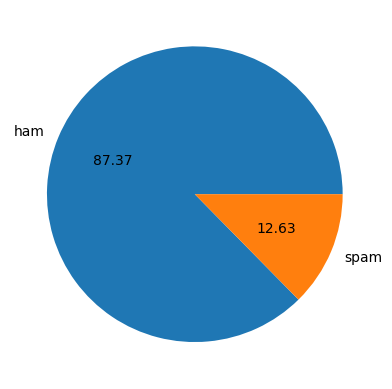

In [14]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct = '%0.2f')
plt.show()

In [15]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [16]:
df['text_characters'] = df['message'].apply(len)

In [17]:
df

,label,message,target,text_characters
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,160
5568,ham,Will ü b going to esplanade fr home?,0,36
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57
5570,ham,The guy did some bitching but I acted like i'd...,0,125


In [18]:
df['text_words'] = df['message'].apply(lambda x : len(nltk.word_tokenize(x)))
df.head()

,label,message,target,text_characters,text_words
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24
1,ham,Ok lar... Joking wif u oni...,0,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37
3,ham,U dun say so early hor... U c already then say...,0,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15


In [19]:
import seaborn as sns

<Axes: xlabel='text_characters', ylabel='Count'>

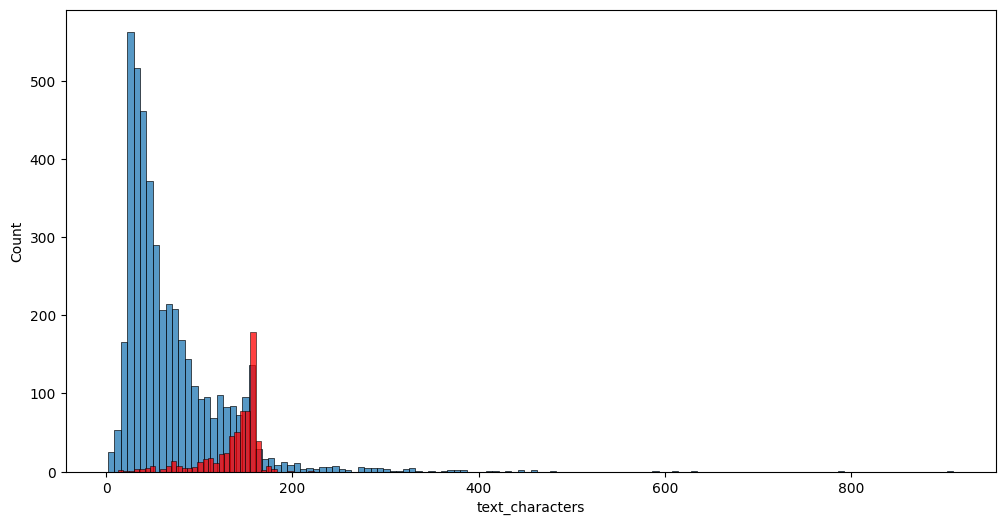

In [20]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['text_characters'])
sns.histplot(df[df['target']==1]['text_characters'], color = 'red')

<Axes: xlabel='text_words', ylabel='Count'>

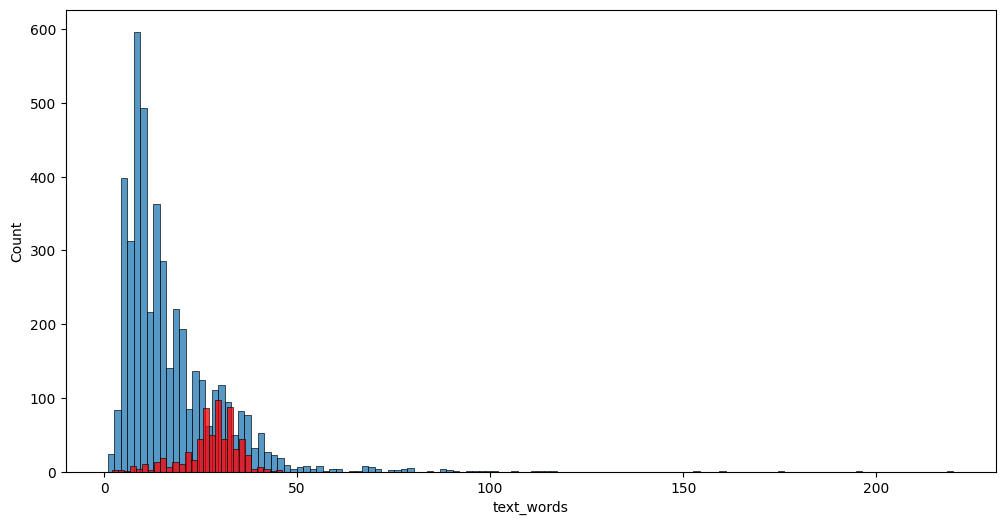

In [21]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['text_words'])
sns.histplot(df[df['target']==1]['text_words'], color = 'red')

## **Data Preprocessing**

In [22]:
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
import string


def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  # text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)
  y = []

  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [24]:
df['transformed_text'] = df['message'].apply(transform_text)

In [25]:
df.head()

,label,message,target,text_characters,text_words,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,0,29,8,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,0,49,13,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15,nah think goe usf live around though


In [26]:
from wordcloud import WordCloud
wc = WordCloud(width = 700, height = 700, min_font_size = 13, background_color = 'white')

In [27]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

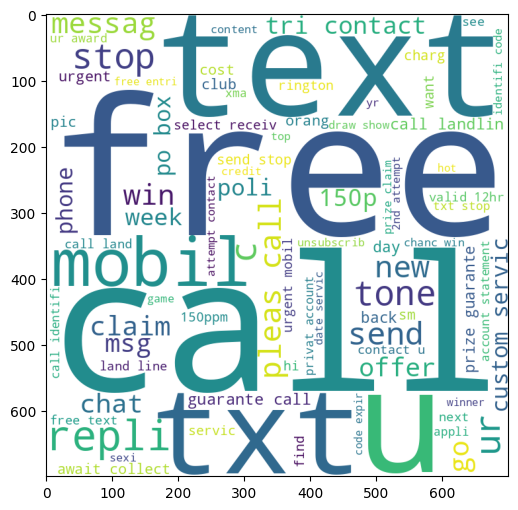

In [28]:
plt.figure(figsize = (15, 6))
plt.imshow(spam_wc)

In [29]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

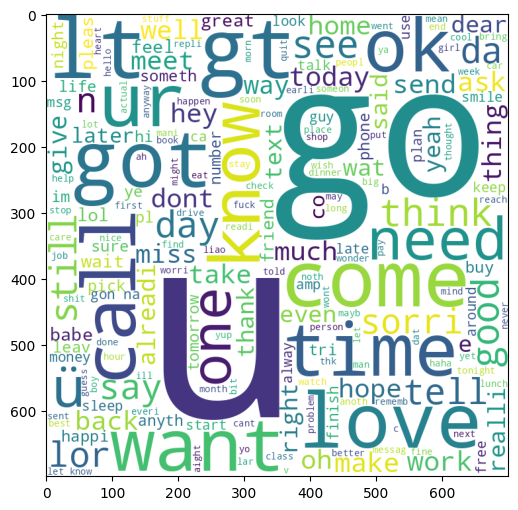

In [30]:
plt.figure(figsize = (15, 6))
plt.imshow(spam_wc)

In [31]:
df.head()

,label,message,target,text_characters,text_words,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,0,29,8,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,0,49,13,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15,nah think goe usf live around though


In [32]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [33]:
len(spam_corpus)

9982

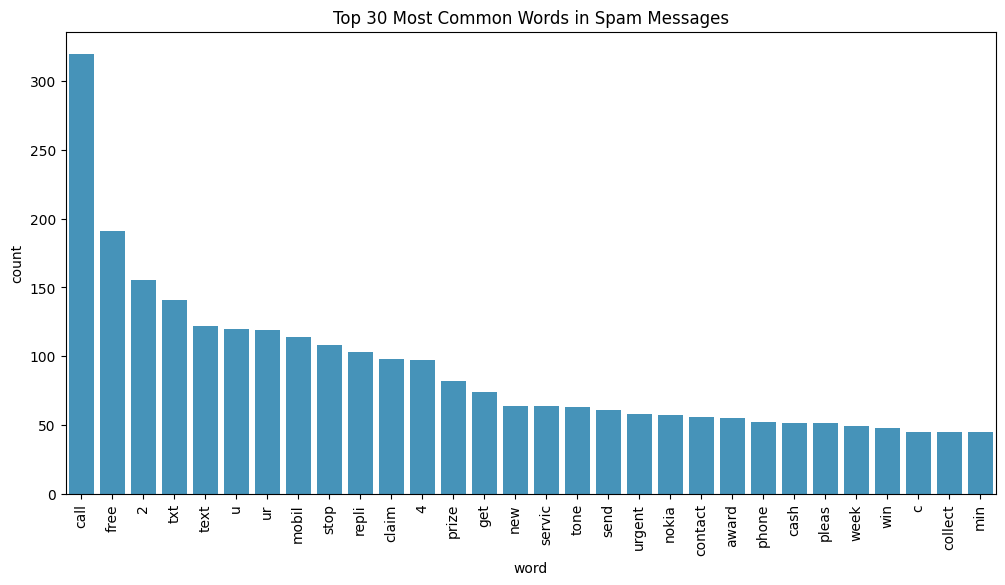

In [34]:
from collections import Counter
common_words = Counter(spam_corpus).most_common(30)
df_common = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=df_common, color =(0.2, 0.6, 0.8))
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Words in Spam Messages")
plt.show()

In [35]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [36]:
len(ham_corpus)

35939

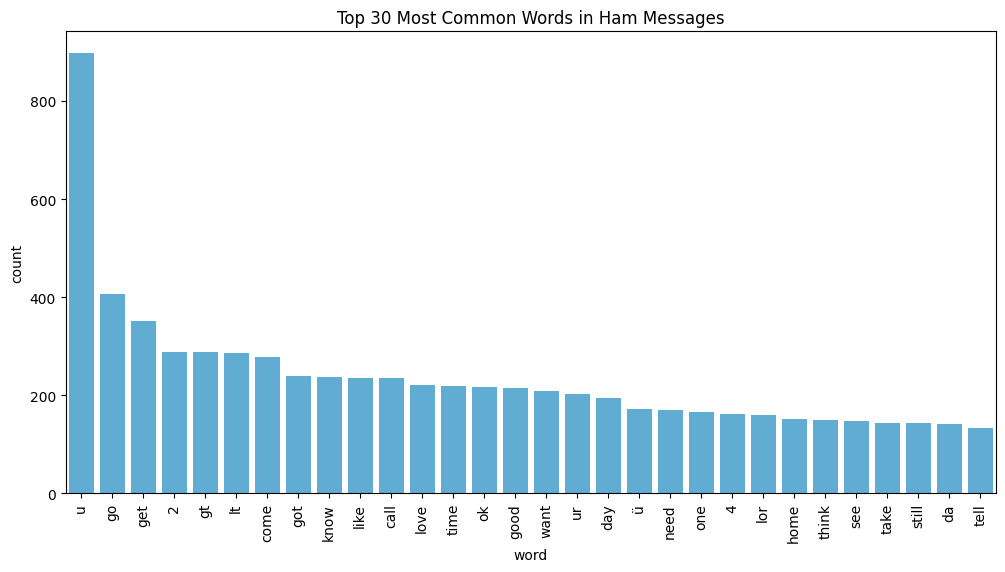

In [37]:
ham_common_words = Counter(ham_corpus).most_common(30)
df_common = pd.DataFrame(ham_common_words, columns=['word', 'count'])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=df_common, color =(0.3, 0.7, 0.9))
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Words in Ham Messages")
plt.show()

## **Model Building**

In [137]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [138]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [139]:
X.shape

(5169, 3000)

In [140]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [143]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [144]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [125]:
gnb.fit(x_train, y_train)
y_pred1  =  gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[780 114]
 [ 21 119]]
0.5107296137339056


In [126]:
mnb.fit(x_train, y_train)
y_pred2  =  mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9748549323017408
[[894   0]
 [ 26 114]]
1.0


In [145]:
bnb.fit(x_train, y_train)
y_pred3  =  bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9854932301740812
[[894   0]
 [ 15 125]]
1.0


In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [129]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [130]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': bnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [131]:
def train_classifier(clf, x_train, y_train, x_test, y_test):
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)

  return accuracy, precision

In [132]:
train_classifier(svc, x_train, y_train, x_test, y_test)

(0.9738878143133463, 0.959349593495935)

In [133]:
accuracy_scores = []
precision_scores = []
for name, clf in clfs.items():
  current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)
  print(f'{name} accuracy is {current_accuracy}')
  print(f'{name} precision is {current_precision}')
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

SVC accuracy is 0.9738878143133463
SVC precision is 0.959349593495935
KN accuracy is 0.9100580270793037
KN precision is 1.0
NB accuracy is 0.9854932301740812
NB precision is 1.0
DT accuracy is 0.9381044487427466
DT precision is 0.8392857142857143
LR accuracy is 0.9516441005802708
LR precision is 0.9245283018867925
RF accuracy is 0.9806576402321083
RF precision is 0.9918032786885246
AdaBoost accuracy is 0.925531914893617
AdaBoost precision is 0.8315789473684211
BgC accuracy is 0.965183752417795
BgC precision is 0.8939393939393939
ETC accuracy is 0.9796905222437138
ETC precision is 0.983739837398374
GBDT accuracy is 0.9545454545454546
GBDT precision is 0.9603960396039604
xgb accuracy is 0.9680851063829787
xgb precision is 0.9734513274336283


In [134]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.910058,1.000000
2,NB,0.985493,1.000000
5,RF,0.980658,0.991803
8,ETC,0.979691,0.983740
10,xgb,0.968085,0.973451
9,GBDT,0.954545,0.960396
0,SVC,0.973888,0.959350
4,LR,0.951644,0.924528
7,BgC,0.965184,0.893939
3,DT,0.938104,0.839286


In [135]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.910058
1,NB,Accuracy,0.985493
2,RF,Accuracy,0.980658
3,ETC,Accuracy,0.979691
4,xgb,Accuracy,0.968085
5,GBDT,Accuracy,0.954545
6,SVC,Accuracy,0.973888
7,LR,Accuracy,0.951644
8,BgC,Accuracy,0.965184
9,DT,Accuracy,0.938104


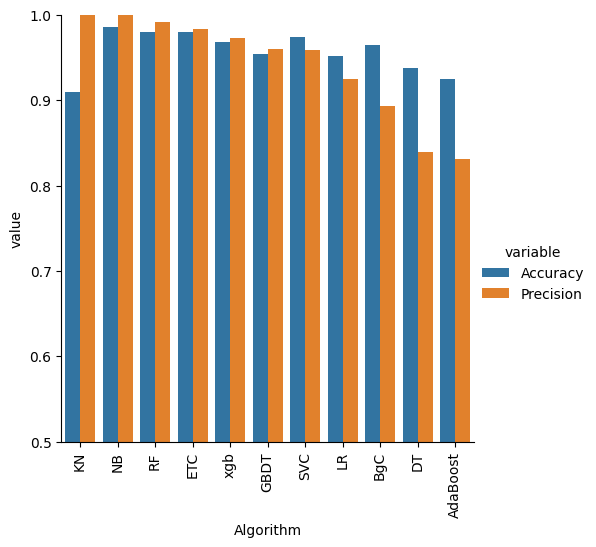

In [136]:
sns.catplot(x='Algorithm', y='value', data= performance_df1, kind='bar', height = 5, hue='variable')
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

In [147]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(bnb, open('email_classifier.pkl', 'wb'))